In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseData = pd.read_csv(mouse_drug_data_to_load)
TrialData = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
completedrugdata = pd.merge(MouseData, TrialData, how="left", on=["Mouse ID"])

# Display the data table for preview
completedrugdata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Set new dataframe groupby the Drug column and the timepoint of the drugs
tumor_size_df = completedrugdata.groupby(["Drug", "Timepoint"])

# Sets a list based on the mean of tumor volume dataframe
avg_tumor_size_l = tumor_size_df["Tumor Volume (mm3)"].mean()

# Sets a dataframe based on the list of average tumor volumes
avg_tumor_size_df = pd.DataFrame(avg_tumor_size_l)
avg_tumor_size_df.head()     

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked 

# Set new list based on the dataframe
# Sets a groupby based on the timepoint of the drugs
    # This groupby will also pull in the average tumor volume based on the standard error mean
tumor_error_rate = completedrugdata.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Sets a new data frame using the information from the groupby
# Setting it to to_frame() allows it to pull in both labels and integers
drug_df = tumor_error_rate.to_frame()
drug_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

# Reformated the list of drug information
tumor_plot_pre = avg_tumor_size_df.unstack(0) 

# Set a new dataframe focused on 
tumor_plot_df = tumor_plot_pre["Tumor Volume (mm3)"]
tumor_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


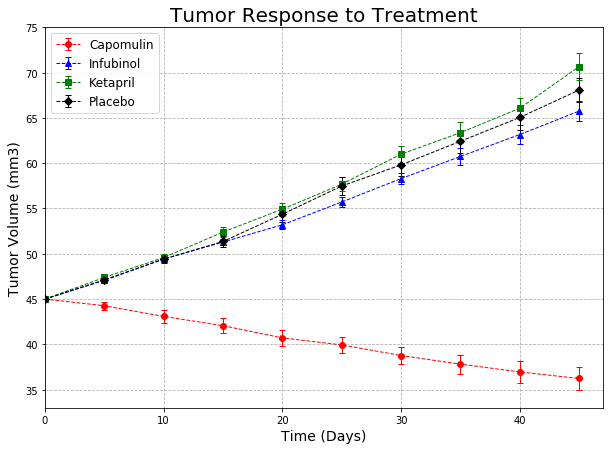

In [5]:
# x axis data points to measure on while also setting the limit
    # sets the dimensions of the figure size
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

# sets the error using a dataframe that pulls in the volume and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = drug_df["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

# sets the error using a dataframe that pulls in the volume and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = drug_df["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

# sets the error using a dataframe that pulls in the volume and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = drug_df["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

# sets the error using a dataframe that pulls in the volume and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = drug_df["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

# sets the limits/ranges for the x and y axis
plt.ylim(33, 75)
plt.xlim(0, 47)

# adds the title and labels for the graph
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

#sets the grid and legend for the graph
plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

# set a new dataframe for the drug and timepoint information that would pull the count of the data
completedrugdata.groupby("Drug")["Timepoint"].count()

# Set new dataframe groupby the Drug column and the timepoint of the drugs
metastatic_size_df = completedrugdata.groupby(["Drug", "Timepoint"])

# Sets a list based on the mean of tumor volume dataframe
metastatic_df = metastatic_size_df["Metastatic Sites"].mean().to_frame()

# Sets a dataframe based on the list of average tumor volumes
metastatic_df.head() 

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

# Reformated the list of drug information so it can be plotted better
avg_metastatic_df = metastatic_df.unstack(0)

# Set a new dataframe focused on metastatic sites
metastatic_plot_df = avg_metastatic_df["Metastatic Sites"]
metastatic_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


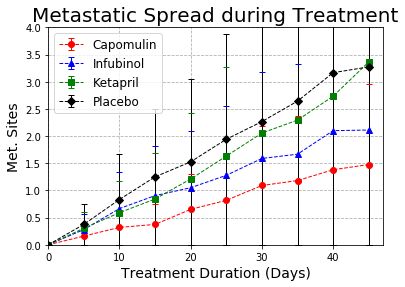

In [8]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

# x axis data points to measure on while also setting the limit
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 50

# sets the error using a dataframe that pulls in the metastatic sites and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = metastatic_df["Metastatic Sites"]["Capomulin"]
cap = plt.errorbar(x_axis, metastatic_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

# sets the error using a dataframe that pulls in the metastatic sites and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = metastatic_df["Metastatic Sites"]["Infubinol"]
infu = plt.errorbar(x_axis, metastatic_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

# sets the error using a dataframe that pulls in the metastatic sites and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = metastatic_df["Metastatic Sites"]["Ketapril"]
keta = plt.errorbar(x_axis, metastatic_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

# sets the error using a dataframe that pulls in the metastatic sites and drug
    # sets the errorbar x axis as its own value, y axis as the drug, yerr based on the size of the error 
error = metastatic_df["Metastatic Sites"]["Placebo"]
plac = plt.errorbar(x_axis, metastatic_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

# sets the range for both the x and y axis
plt.ylim(0, 4)
plt.xlim(0, 47)

# setting the title and x/y labels
plt.title("Metastatic Spread during Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Met. Sites", fontsize=14)

# setting the gridlines of the chart as well as the legend
plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Survival Rates

In [9]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

# set a dataframe focused on the unique elements of a dataframe that will also set data as columns
mice_count = completedrugdata.groupby(['Drug','Timepoint'])['Mouse ID'].nunique()
print(type(mice_count))

# converts a series to a dataframe
mice = mice_count.to_frame()

# renames mouse id to mouse count
mice = mice.rename(columns = {"Mouse ID": "Mouse Count"})
mice_count.head()

<class 'pandas.core.series.Series'>


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [10]:
# sets rows into columns
mice_plot = mice.unstack(0)

# sets plot based on the mouse count
mice_df = mice_plot["Mouse Count"]
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


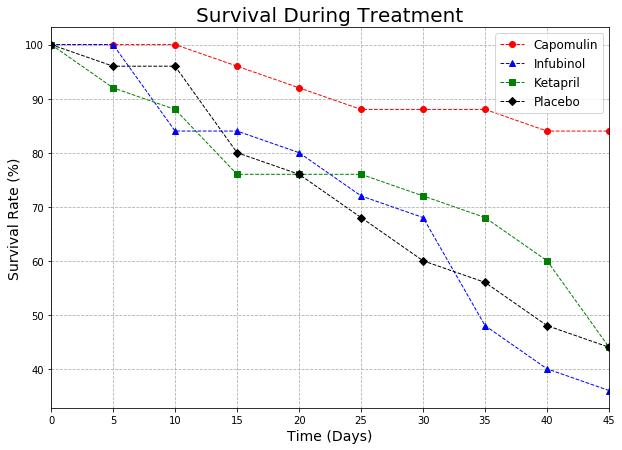

In [11]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

# sets the size of the figure
plt.figure(figsize=(10,7))

# sets therrorbar for the information provided, looking for a percentage
cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

# sets the limit for th x and y ax
plt.xlim(0, 45)

# sets the title and x/y labels
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

# sets the gridline and legend
plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Summary Bar Graph

In [12]:
# Calculate the percent changes for each drug
# Display the data to confirm

# sets the percentage of each drug by taking the highest point and subtracting from the lowest point, deviding by days and 
# multiplying by 100
capchange = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placchange = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propchange = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramichange = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100

# set a dataframe based on the percentages and information changed
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


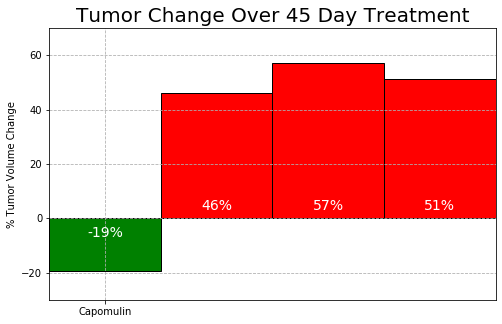

In [16]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure

plt.figure(figsize=(8,5))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)